<h2> Welcome to my project for 
<br>Programming Language Design And Implementation </h2>
<h3> I will be using a Heart Diseases dataset<br>Starts by checking for nulls and clean data to match our standards<br> Check for redundency and correlation<br>Demonstrate our data with EDA<br> Teach a model with Logistic Regression <br> Lastly testing its accuracy </h3>

The imports i need

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



Reading the csv and creating a DataFrame,<br>
To keep it safe i used a copy of it and name it mysheet

In [2]:
df = pd.read_csv('heart.csv')
headers = df.columns
mysheet = df.copy()

I put the column headers in an array so i can access them easily like: 

In [3]:
print(headers[6])

RestingECG


<h2> Small idea about the mysheet</h2>

In [4]:
mysheet.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
mysheet.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<h1> First i do is check if any of my data is duplicated </h1>
in case there is a duplicate we will drop the row

In [6]:
duplicates = mysheet.duplicated().sum()
print(duplicates)

if duplicates != 0 :
    mysheet.drop_duplicates()

0


<h1> Second i check if i have any nulls to deal with </h1>

In [7]:
mysheet.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We have no nulls

<h5>Assuming i had null values in HeartDisease column i would just fill it with 0 </h5>

In [8]:
mysheet[headers[-1]].fillna(0, inplace=True)

<h5>And if null values were in Cholesterol column it will be filled by the Mean of that column</h5>

In [9]:
print(headers[4])

mean = int(mysheet[headers[4]].mean())
print("The mean: ", mean)

mysheet[ headers[4] ].fillna(mean , inplace=True )

Cholesterol
The mean:  198


<h5>Lastly if null values were in ChestPainType column it will be filled with the Mode of the column </h5>
which is the most mentioned type of chest pain in the dataset

In [10]:
print(headers[2])

mode = df[headers[2]].mode()[0]
print("The mode: ", mode)

df[headers[2]].fillna(mode, inplace=True)

ChestPainType
The mean:  ASY


<h1> Cleaning my Data

RestingBP column in my data should not contain any zero, so to solve that i will replace zero with the mean of the column

In [11]:
print(headers[3])
mysheet[headers[3]] = mysheet[headers[3]].replace(0, mysheet[headers[3]].mean())

RestingBP


Same thing is for cholestrol

In [12]:
print(headers[4])
mysheet[headers[4]] = mysheet[headers[4]].replace(0, mysheet[headers[4]].mean())

Cholesterol


Thankfully most of the data is clean, We dont have strings in int column nor the other way around.<br>
But assuming i have strings in int column i would drop the row like this

I will switch the column to numeric and every string will turn into a Nan or a NULL <br> Then i will check and drop rows with null values and irrelevant features

In [13]:
mysheet[headers[0]] = pd.to_numeric(mysheet[headers[0]], errors='coerce')

mysheet = mysheet.dropna(subset=[headers[0]])

print(headers[0])


Age


<h1> Heat Map </h1>
After cleaning our data and fixing it, its time we check for correlation

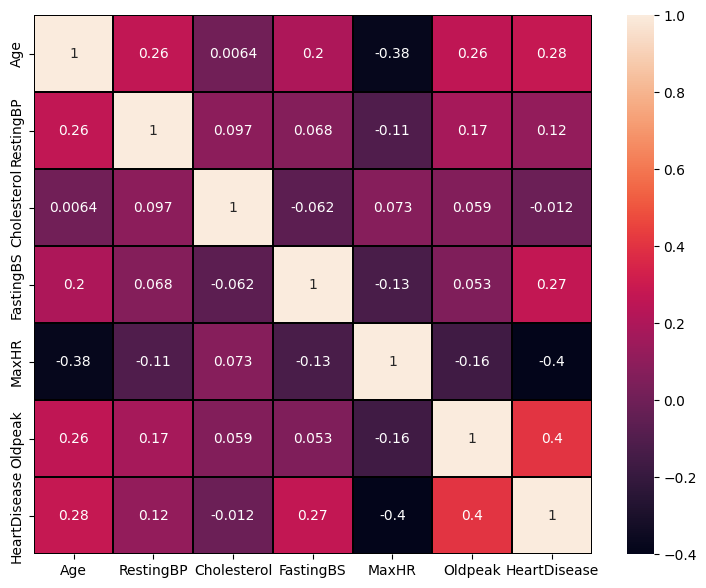

In [14]:
# We take all numerical columns we have to check them, string values wont be any help to us
numerical_data = mysheet.select_dtypes(include=[int, float])

matrix = numerical_data.corr()
plt.figure(figsize=(9,7))
sns.heatmap(matrix, annot = True , linewidths = 0.1, linecolor="black")
plt.show()

We can see our some of our data is related to each other since they have positive correlation
Like Age and HeartDisease
And some are unrelated because their correlation is negative
Like Age and MaxHR

Generally we have a neutral correlation, nothing to be concerned about
If Redundancy appearead we'd have a high number, above 0.5 is considered redundent.
There for we would have to solve it by either:
<li>
Removal:
Drop one of the features from the highly correlated pairs. Considering main knowledge to select the most relevant features for us.
<li>Dimensionality Reduction:
Apply techniques like PCA or LDA to reduce feature space while preserving information.
<li> Feature Selection:
Use advanced methods like RFE or L1 regularization to select important features that we want.

<br>

<h1> EDA </h1>

Here we will do Exploratory Data Analysis on our data set

1) Checking the Age in relation to heart diseases

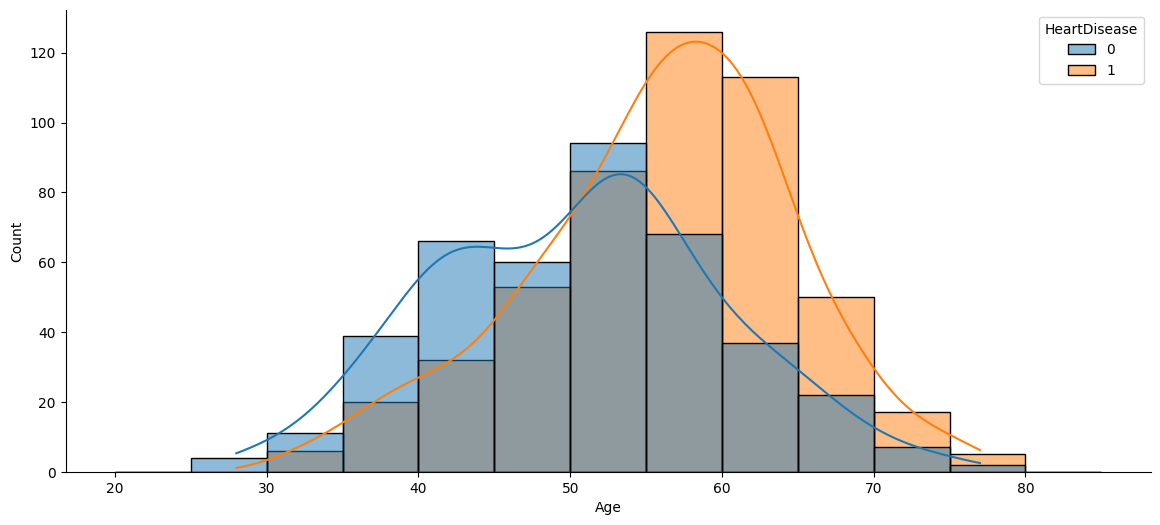

In [15]:
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
plt.figure(figsize=(14, 6))
sns.histplot(data=mysheet, x="Age", kde=True, hue="HeartDisease", bins=bins)
sns.despine(top=True, right=True)

2) Checking the Gender in relation to heart diseases

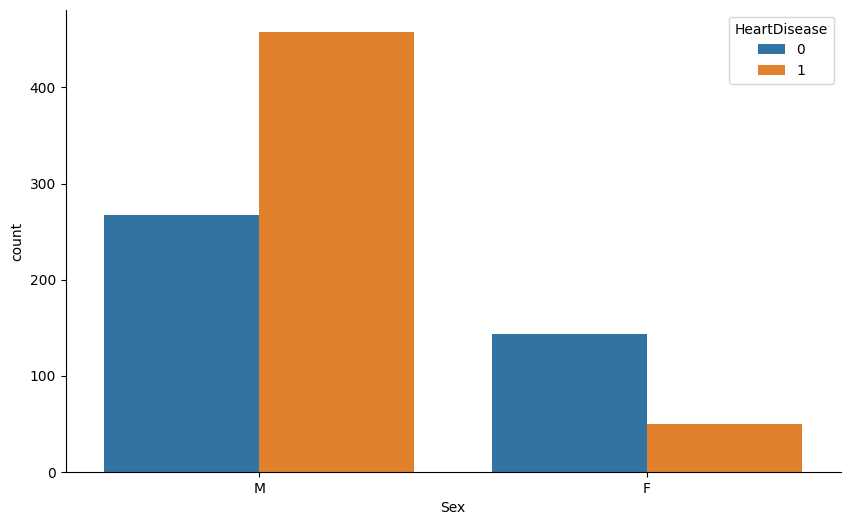

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=mysheet, x="Sex", hue="HeartDisease")
sns.despine(top=True, right=True)

3) Checking the Cholesterol in relation to heart diseases

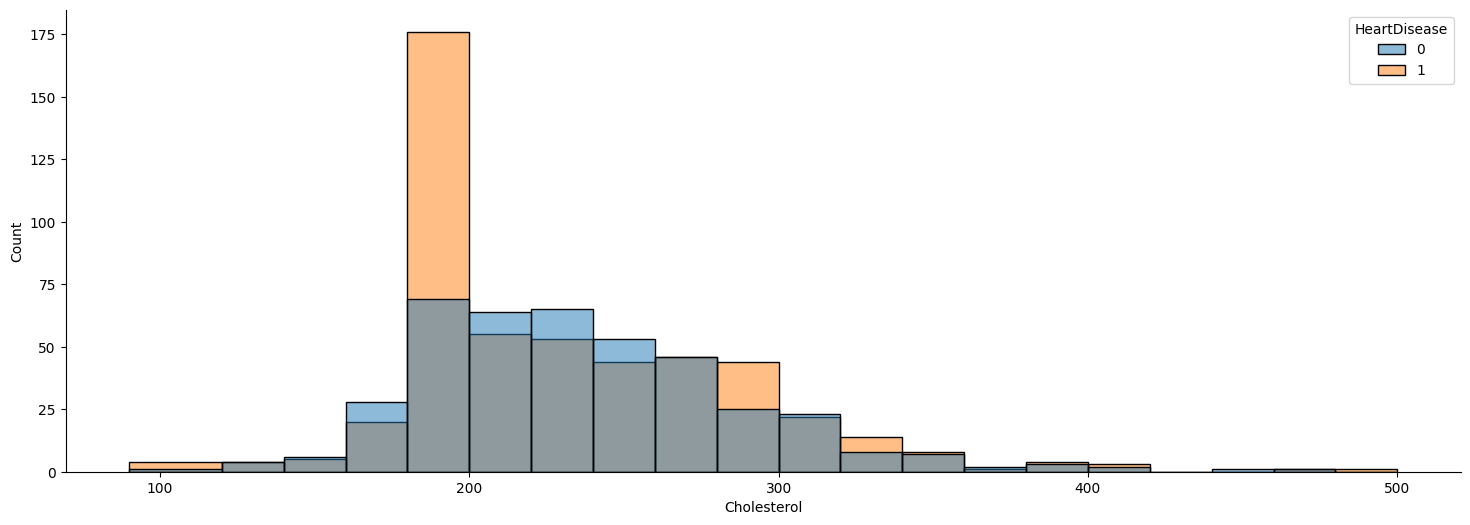

In [17]:
bins = [90, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500]
plt.figure(figsize=(18, 6))
sns.histplot(data=mysheet , x="Cholesterol", bins=bins, hue= "HeartDisease")
sns.despine(top=True, right=True)

4) Checking the Chest Pain in relation to heart diseases

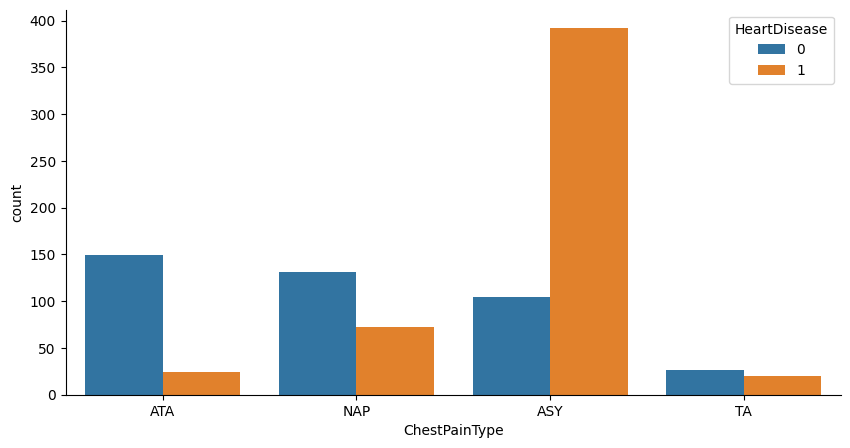

In [18]:
plt.figure(figsize = (10 , 5))
sns.countplot( data= mysheet, x="ChestPainType", hue ="HeartDisease")
sns.despine()


<h1> Machine Learning Prediction</h1>

We first set up our data for x and y 
x being the columns without HeartDisease
y is HeartDisease column

In [19]:
dummies = pd.get_dummies(mysheet, drop_first=True)
X = dummies.drop("HeartDisease", axis=1)
y = dummies["HeartDisease"]
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,False,True,False,False,False,False,False,True,False


Splitting the data with the ratio of 67% to train, which means 33% is left so we use 0.33 as our test size

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(615, 15) (303, 15) (615,) (303,)


<h2> Logistic Regression</h2>
since our values in HeartDisease is binary, we cant predict using linear regression, instead we use Logistic Regression.

In [21]:
log_reg = LogisticRegression(solver="liblinear").fit(x_train ,y_train)

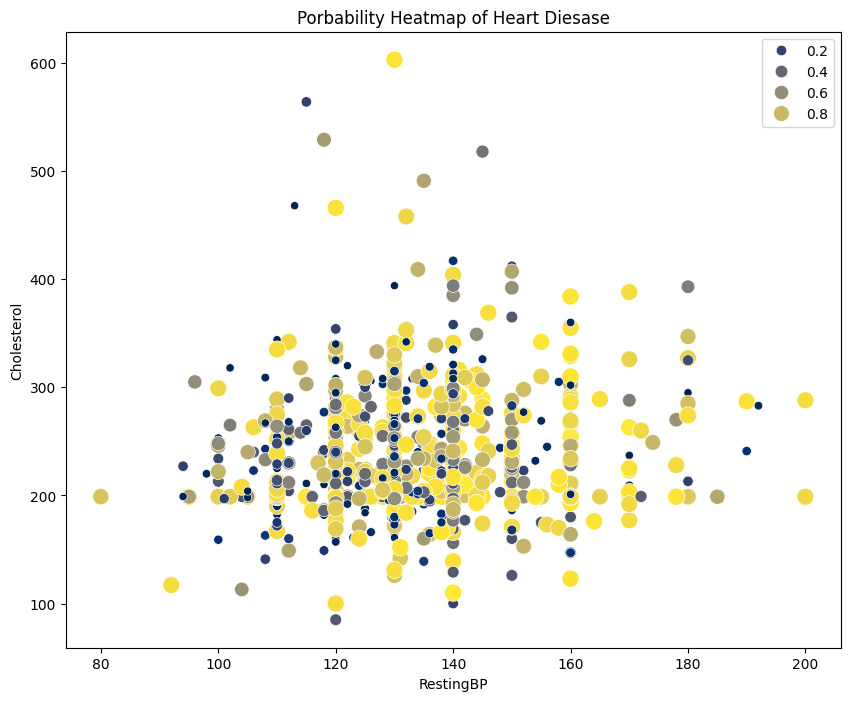

In [22]:
y_pred = log_reg.predict_proba(X)[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=y_pred, palette="cividis", size=y_pred, sizes=(35, 155))
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.title('Porbability Heatmap of Heart Diesase')
plt.show()


<h3> As we can see with higher RestingBP and higher Cholestrol levels,<br> our model predicts chances of Heart Disease are getting higher

Here we scale X to fit with Scaler <br> 
So we check for the confusion matrix

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.33)
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

(615, 15) (303, 15) (615,) (303,)


<h3> We get a Confusion Matrix for our Logistic Regression </h3>

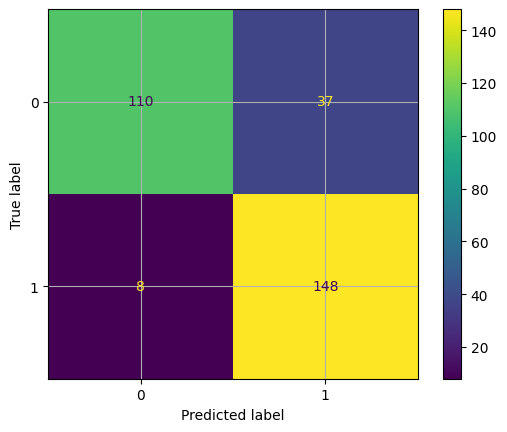

F1 score here for our Logistic Regression is:  0.8680351906158358


In [24]:
log_reg_scaled = LogisticRegression(solver="liblinear").fit(x_train2 ,y_train2)
y_pred2 = log_reg_scaled.predict(x_test2)
ConfusionMatrixDisplay.from_estimator( log_reg_scaled, x_test2, y_test2 )
plt.grid()
plt.show()
f1 = f1_score( y_test2, y_pred2)
print("F1 score here for our Logistic Regression is: ",f1)

In [25]:
accuracy = accuracy_score(y_test2, y_pred2)
print("The accuracy of my model to detect Heart Diseases is: " ,accuracy)

The accuracy of my model to detect Heart Diseases is:  0.8514851485148515


Its under 0.9 because of the little far correlation between the numerical data we have<br>
But overall its a fairly good number

=====================================================================

# Project done by:<h4> Omair Hamd alla <br>B2180.060089 </h4> 

# Refrences : <br>
Logistic Regression : https://www.ibm.com/topics/logistic-regression
<br>
Logistic Regression in python: https://www.w3schools.com/python/python_ml_logistic_regression.asp
<br>
Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
<br>
Plotting and EDA: https://pythonplot.com/
<br>
Redundency and seaborn: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

